In [1]:
import numpy as np
import pandas as pd
import glob

from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import matplotlib as mpl

mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['legend.fontsize'] = 12
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

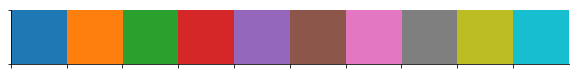

In [4]:
import seaborn as sns
sns.palplot(sns.color_palette())

In [4]:
green = sns.color_palette()[2]
red = sns.color_palette()[3]

# PG Bookshelves
We use PG bookshelves as labels, see here [here](http://www.gutenberg.org/wiki/Category:Bookshelf).
This notebook shows in which sense BS are better than subjects.
This notebook uses the bookshelves generated in the main `gutenberg` repo.
For a more self-contained, older version, see `notebooks/old/Bookshelves_generation.ipynb`.

### Statistics before filtering BS

In [6]:
df = pd.read_pickle("../../gutenberg-frozen-2018-07-18/metadata/bookshelves_raw.p")

In [13]:
import sys
sys.path.append("../../gutenberg/src/")
from metaquery import meta_query
mq = meta_query(path="../../gutenberg-frozen-2018-07-18/metadata/metadata.csv", filter_exist=False)

In [14]:
# restrict to books we have
bookswehave = mq.df.id.values
new_idx = (np.intersect1d(df.index, bookswehave))
df = df.loc[new_idx]

In [15]:
# how many books and bs
df.shape

(0, 236)

In [ ]:
# how many books are part of how many bookshelves
Counter(df.sum(axis=1))

In [ ]:
x = np.array(list(list(zip(*sorted(list(Counter(df.sum(axis=1)).items()))))[1]))
x = x/np.sum(x)

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 2), tight_layout=True)
color = green

ax = ax2
ax.barh(range(3)[::-1], [x[0], x[1], np.sum(x[2:])], color=color)
ax.set_yticks(range(3))
ax.set_yticklabels(["in more than two", "in two bookshelves", "in one bookshelf"])
ax.set_xlabel("Percent of books")
ax.set_xlim(0, 1)
ax.set_xticks([0, 0.25, 0.5, 0.75, 1][::2])
ax.set_xticklabels(["0%", "25%", "50%", "75%", "100%"][::2])
fig.savefig("../figures/bookshelves_per_book.pdf")

bs_sizes = df.sum().sort_values(ascending=False)

bs_sizes = bs_sizes.loc[bs_sizes>4]

ax = ax1
bins = np.linspace(0.6, 3.2, num=20)
ax.hist(np.log10(bs_sizes), bins=bins, color=color);
xticks = [5, 20, 100, 500]
ax.set_xticks([np.log10(x) for x in xticks])
ax.set_xticklabels(xticks)
ax.set_xlabel("Number of books\nper bookshelf")
ax.set_ylabel("Number of\nbookshelves")
fig.savefig("../figures/stats_bookshelf.pdf")

In [ ]:
list_subjects = [[k for k in h.strip("{}")[1:-1].replace("', '","_").split('_')] for h in mq.df['subjects'].replace('set()',np.nan).dropna()]

In [ ]:
subjects_per_book = mq.df['subjects'].replace('set()',np.nan).dropna().apply(lambda x:len([k for k in x.strip("{}")[1:-1].replace("', '","_").split('_')])).values
books_per_subject = list(mq.get_subjects_counts().values())

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 2), tight_layout=True)
color = red
bins = np.linspace(0.6, 3.2, num=20)

ax = ax1
ax.hist(np.log10(books_per_subject), bins=bins, color=color);
xticks = [5, 20, 100, 500]
ax.set_xticks([np.log10(x) for x in xticks])
ax.set_xticklabels(xticks)
ax.set_xlabel("Number of books\nper subject")
ax.set_ylabel("Number of\nsubjects")
fig.savefig("../figures/books_per_subject.pdf")

x = np.array(list(list(zip(*sorted(list(Counter(subjects_per_book).items()))))[1]))
x = x/np.sum(x)
ax = ax2
ax.barh(range(3)[::-1], [x[0], x[1], np.sum(x[2:])], color=red)
ax.set_yticks(range(3))
ax.set_yticklabels(["in more than two", "in two subjects", "in one subject"])
ax.set_xlabel("Percent of books",)
ax.set_xlim(0, 1)
ax.set_xticks([0, 0.5, 1])
ax.set_xticklabels(["0%", "50%",  "100%"])
fig.savefig("../figures/stats_subjects.pdf")